# Sleep Health EDA

---

Data Source: [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

## Import and Cleaning

In [6]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
#read csv

path = '../Sleep_health_and_lifestyle_dataset.csv'

df_full = pd.read_csv(path)

df_full.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
#data cleaning

#change occupation 'Sales Representative' to 'Salesperson'
df_full['Occupation'] = df_full['Occupation'].replace('Sales Representative', 'Salesperson')

#change 'Normal Weight' to 'Normal'
df_full['BMI Category'] = df_full['BMI Category'].replace('Normal Weight', 'Normal')

#rename columns for consistency
df_full.rename(columns={'Quality of Sleep': 'Sleep Quality'}, inplace=True)

df_full.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## General Exploration

Only includes data from people with no known sleep disorder

In [9]:
#remove all sleep disorders from data

df = df_full[df_full['Sleep Disorder'] == 'None']
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [10]:
df.shape

(219, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                219 non-null    int64  
 1   Gender                   219 non-null    object 
 2   Age                      219 non-null    int64  
 3   Occupation               219 non-null    object 
 4   Sleep Duration           219 non-null    float64
 5   Sleep Quality            219 non-null    int64  
 6   Physical Activity Level  219 non-null    int64  
 7   Stress Level             219 non-null    int64  
 8   BMI Category             219 non-null    object 
 9   Blood Pressure           219 non-null    object 
 10  Heart Rate               219 non-null    int64  
 11  Daily Steps              219 non-null    int64  
 12  Sleep Disorder           219 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 24.0+ KB


In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Sleep Quality,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,146.972603,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
std,100.646895,7.827764,0.732320,0.975142,20.929814,1.591471,2.657797,1393.473600
min,1.000000,27.000000,6.000000,6.000000,30.000000,3.000000,65.000000,4200.000000
25%,65.500000,32.000000,7.100000,7.000000,30.000000,4.000000,68.000000,5000.000000
50%,128.000000,38.000000,7.400000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,207.500000,43.000000,7.800000,8.000000,75.000000,6.000000,70.000000,8000.000000
max,360.000000,59.000000,8.500000,9.000000,90.000000,8.000000,77.000000,10000.000000


In [13]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Sleep Quality', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

## Correlation between Sleep Quality and Sleep Duration

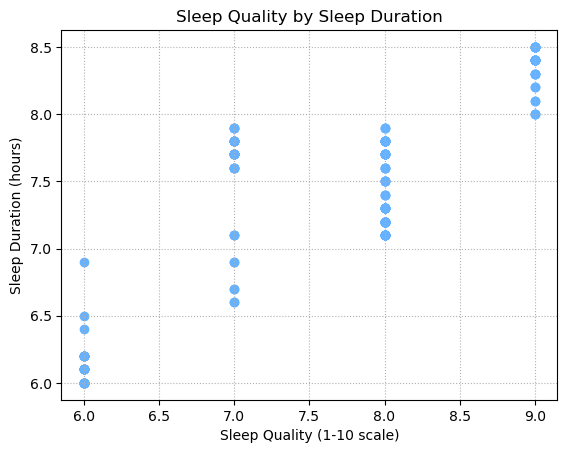

The correlation coefficient between Sleep Quality and Sleep Duration is 0.84


In [14]:
#sleep quality and sleep duration correlation test

#create scatter plot of Sleep Quality by Sleep Duration

plt.scatter(df['Sleep Quality'], df['Sleep Duration'], color='#66B2FF')
plt.xlabel('Sleep Quality (1-10 scale)')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Quality by Sleep Duration')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Sleep Quality'], df['Sleep Duration'])
print(f"The correlation coefficient between Sleep Quality and Sleep Duration is {round(correlation[0],2)}")

### Analysis of Correlation between Sleep Quality and Sleep Duration

The correlation coefficient being so close to 1 at 0.84 suggests that there is a strong positive correlation between duration and quality of sleep. We can safely use both of these measurements to analyze general sleep health in relation to other factors.

---

# Analysis of Sleep Health compared to Occupation

### Null Hypothesis
Occupation has no effect on sleep quality or sleep duration

### Alternative Hypothesis
Occupation does have an effect on sleep quality or sleep duration

In [15]:
#list of all occupations

occupation_counts = df['Occupation'].value_counts()
occupation_counts

Doctor               64
Engineer             57
Lawyer               42
Accountant           30
Nurse                 9
Teacher               9
Software Engineer     3
Scientist             2
Salesperson           2
Manager               1
Name: Occupation, dtype: int64

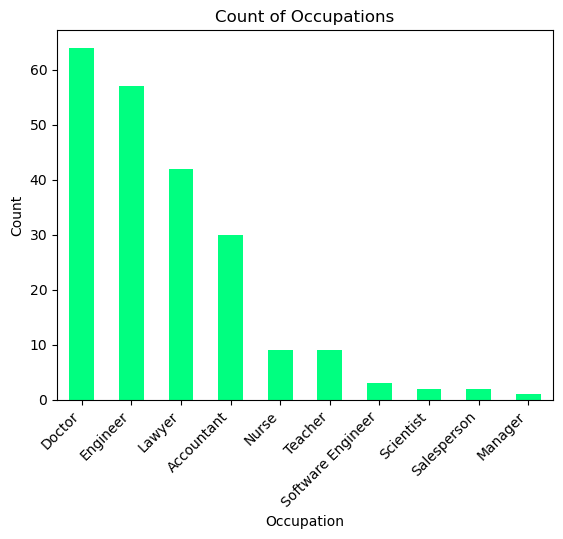

In [16]:
#graph occupation counts

occupation_counts.plot(kind='bar', color='#00FF80')
plt.title('Count of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [17]:
#find average Sleep Duration by Occupation

avg_sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean().reset_index()
avg_sleep_duration

,Occupation,Sleep Duration
0,Accountant,7.220000
1,Doctor,6.943750
2,Engineer,8.038596
3,Lawyer,7.419048
4,Manager,6.900000
5,Nurse,7.222222
6,Salesperson,6.450000
7,Scientist,6.200000
8,Software Engineer,7.033333
9,Teacher,6.933333


In [18]:
#find average Sleep Quality by Occupation

avg_sleep_quality = df.groupby('Occupation')['Sleep Quality'].mean().reset_index()
avg_sleep_quality

,Occupation,Sleep Quality
0,Accountant,8.066667
1,Doctor,6.578125
2,Engineer,8.508772
3,Lawyer,7.928571
4,Manager,7.000000
5,Nurse,7.555556
6,Salesperson,6.000000
7,Scientist,6.000000
8,Software Engineer,7.333333
9,Teacher,7.555556


In [19]:
#merge data frames of sleep health by occupation

sleep_by_occupation = pd.merge(avg_sleep_duration, avg_sleep_quality, on='Occupation')
sleep_by_occupation

,Occupation,Sleep Duration,Sleep Quality
0,Accountant,7.220000,8.066667
1,Doctor,6.943750,6.578125
2,Engineer,8.038596,8.508772
3,Lawyer,7.419048,7.928571
4,Manager,6.900000,7.000000
5,Nurse,7.222222,7.555556
6,Salesperson,6.450000,6.000000
7,Scientist,6.200000,6.000000
8,Software Engineer,7.033333,7.333333
9,Teacher,6.933333,7.555556


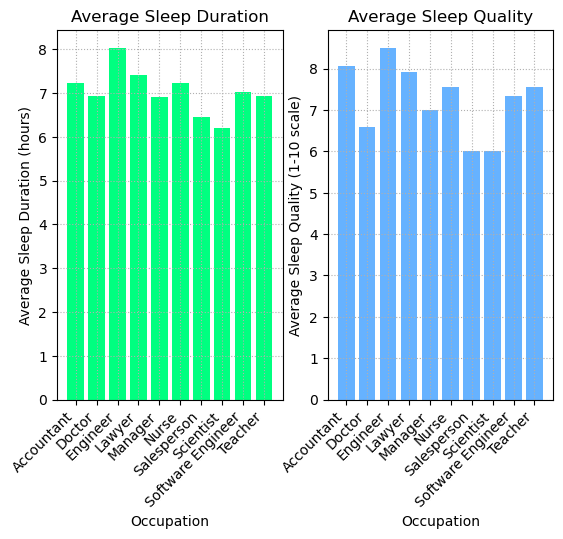

In [20]:
#Separated Graphs

#Sleep Duration by Occupation
plt.subplot(1, 2, 1)
plt.bar(sleep_by_occupation['Occupation'], sleep_by_occupation['Sleep Duration'], color='#00FF80')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.title('Average Sleep Duration')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle=':')

#Sleep Quality by Occupation
plt.subplot(1, 2, 2)
plt.bar(sleep_by_occupation['Occupation'], sleep_by_occupation['Sleep Quality'], color='#66B2FF')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Quality (1-10 scale)')
plt.title('Average Sleep Quality')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle=':')

plt.show()


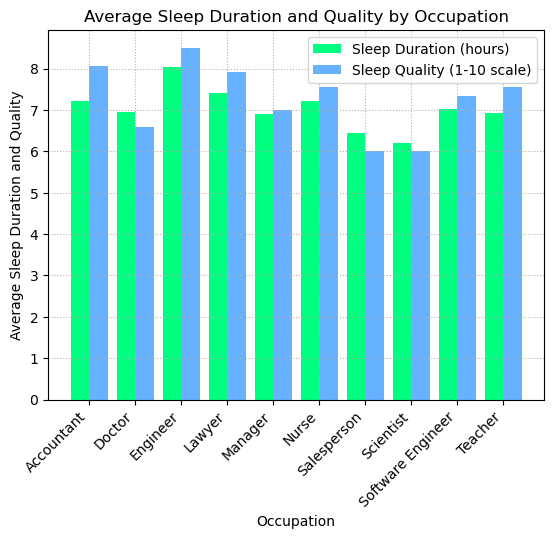

In [21]:
#plot of Sleep Duration and Sleep Quality by Occupation

#plot of the Sleep Duration by Occupation
plt.bar(avg_sleep_duration['Occupation'], avg_sleep_duration['Sleep Duration'], label='Sleep Duration (hours)', width=-0.4, align='edge', color='#00FF80')

#plot of the Sleep Quality by Occupation
plt.bar(avg_sleep_quality['Occupation'], avg_sleep_quality['Sleep Quality'], label='Sleep Quality (1-10 scale)', width=0.4, align='edge', color='#66B2FF')

#plot labels
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration and Quality')
plt.title('Average Sleep Duration and Quality by Occupation')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle=':')

plt.show()

## ANOVA Test by Occupation

### Sleep Quality by Occupation

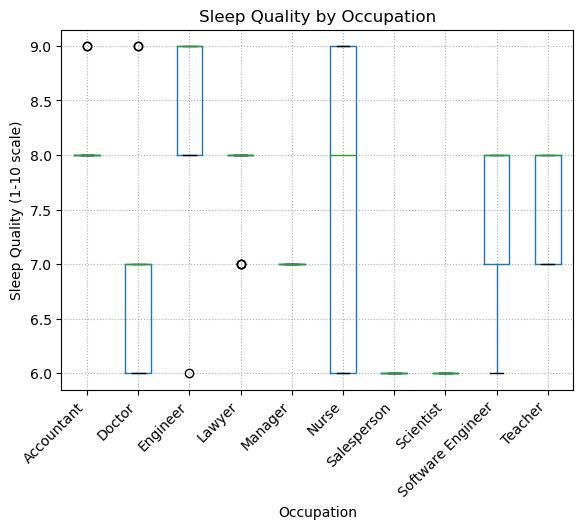

F-statistic: 43.99356295701771
P-value: 1.4558691823787463e-43


In [22]:
#analyze Sleep Quality by Occupation

#create box plot for Sleep Quality by Occupation
df.boxplot('Sleep Quality', by='Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Quality (1-10 scale)')
plt.suptitle('')
plt.title('Sleep Quality by Occupation')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle=':')

plt.show()

#perform ANOVA test
result = stats.f_oneway(
    df[df['Occupation'] == 'Accountant']['Sleep Quality'],
    df[df['Occupation'] == 'Doctor']['Sleep Quality'],
    df[df['Occupation'] == 'Engineer']['Sleep Quality'],
    df[df['Occupation'] == 'Lawyer']['Sleep Quality'],
    df[df['Occupation'] == 'Manager']['Sleep Quality'],
    df[df['Occupation'] == 'Nurse']['Sleep Quality'],
    df[df['Occupation'] == 'Salesperson']['Sleep Quality'],
    df[df['Occupation'] == 'Scientist']['Sleep Quality'],
    df[df['Occupation'] == 'Software Engineer']['Sleep Quality'],
    df[df['Occupation'] == 'Teacher']['Sleep Quality']
)

print(f"F-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

### Analysis of ANOVA Test - Sleep Quality by Occupation

The extremely small p-value and high f-statistic suggest that there is a statistically significant difference in sleep quality per occupation.

### Sleep Duration by Occupation

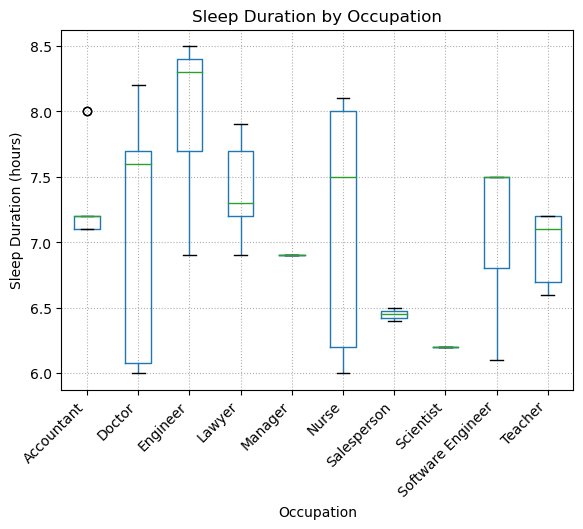

F-statistic: 14.4057292966409
P-value: 4.9400905811667625e-18


In [23]:
#analyze Sleep Duration by Occupation

#create box plot for Sleep Duration by Occupation
df.boxplot('Sleep Duration', by='Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.suptitle('')
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle=':')

plt.show()

#perform ANOVA test
result = stats.f_oneway(
    df[df['Occupation'] == 'Accountant']['Sleep Duration'],
    df[df['Occupation'] == 'Doctor']['Sleep Duration'],
    df[df['Occupation'] == 'Engineer']['Sleep Duration'],
    df[df['Occupation'] == 'Lawyer']['Sleep Duration'],
    df[df['Occupation'] == 'Manager']['Sleep Duration'],
    df[df['Occupation'] == 'Nurse']['Sleep Duration'],
    df[df['Occupation'] == 'Salesperson']['Sleep Duration'],
    df[df['Occupation'] == 'Scientist']['Sleep Duration'],
    df[df['Occupation'] == 'Software Engineer']['Sleep Duration'],
    df[df['Occupation'] == 'Teacher']['Sleep Duration']
)

print(f"F-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

### Analysis of ANOVA Test - Sleep Duration by Occupation

The extremely small p-value and high f-statistic suggest that there is a statistically significant difference in sleep duration per occupation.

## Analysis of ANOVA Test on Sleep Health by Occupation

Looking at the results for both ANOVA tests run on sleep health, we can safely reject the null hypothesis and confirm that occupation does impact sleep quality and sleep duration. Certain occupations are highly likely to result in lower quality sleep and less hours of sleep.

---

# Analysis of Sleep Health compared to Excercise Levels

### Null Hypothesis
Physical Activity Level and Daily Steps have no effect on Sleep Quality or Sleep Duration

### Alternative Hypothesis
Physical Activity Level and Daily Steps do have an effect on Sleep Quality or Sleep Duration

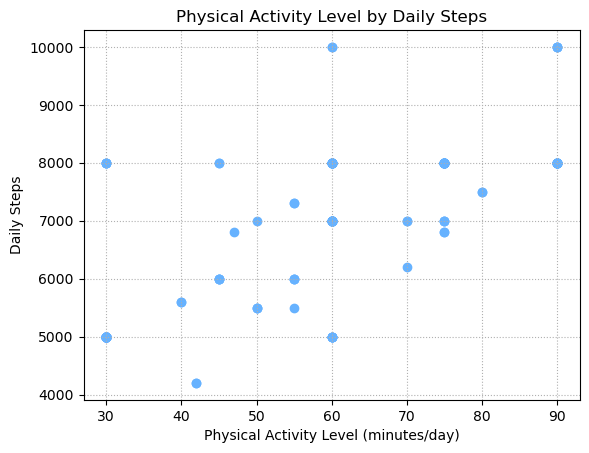

The correlation coefficient between Physical Activity Level and Daily Steps is 0.79


In [24]:
#physical activity level and daily steps correlation test

#create scatter plot of Physical Activity Level by Daily Steps

plt.scatter(df['Physical Activity Level'], df['Daily Steps'], color='#66B2FF')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Daily Steps')
plt.title('Physical Activity Level by Daily Steps')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Physical Activity Level'], df['Daily Steps'])
print(f"The correlation coefficient between Physical Activity Level and Daily Steps is {round(correlation[0],2)}")

## Pearson Correlation Coefficient by Exercise

### Sleep Quality by Physical Activity Level

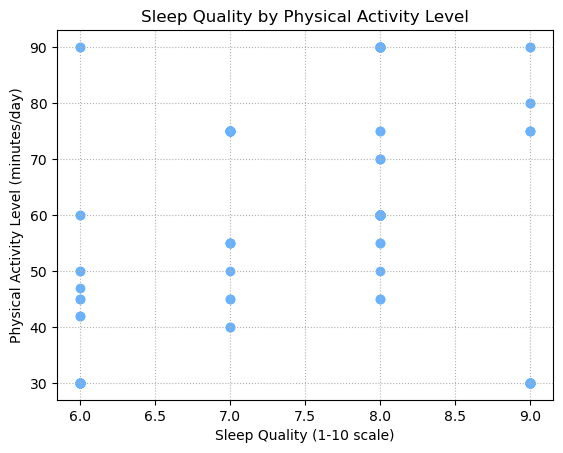

The correlation coefficient between Sleep Quality and Physical Activity Level is 0.11


In [25]:
#create scatter plot of Sleep Quality by Physical Activity Level

plt.scatter(df['Sleep Quality'], df['Physical Activity Level'], color='#66B2FF')
plt.xlabel('Sleep Quality (1-10 scale)')
plt.ylabel('Physical Activity Level (minutes/day)')
plt.title('Sleep Quality by Physical Activity Level')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Sleep Quality'], df['Physical Activity Level'])
print(f"The correlation coefficient between Sleep Quality and Physical Activity Level is {round(correlation[0],2)}")

### Sleep Duration by Physical Activity Level

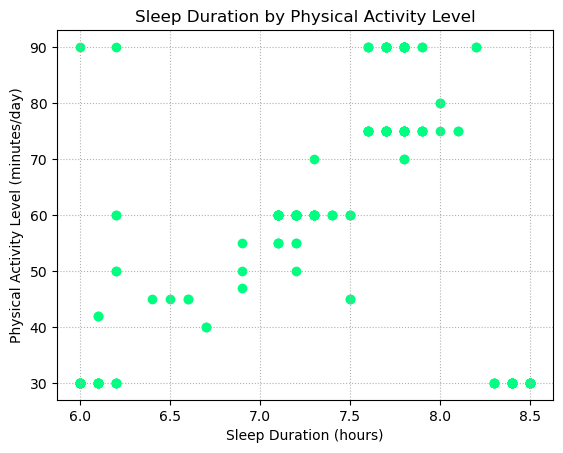

The correlation coefficient between Sleep Duration and Physical Activity Level is 0.26


In [26]:
#create scatter plot of Sleep Duration by Physical Activity Level

plt.scatter(df['Sleep Duration'], df['Physical Activity Level'], color='#00FF80')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Physical Activity Level (minutes/day)')
plt.title('Sleep Duration by Physical Activity Level')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Sleep Duration'], df['Physical Activity Level'])
print(f"The correlation coefficient between Sleep Duration and Physical Activity Level is {round(correlation[0],2)}")

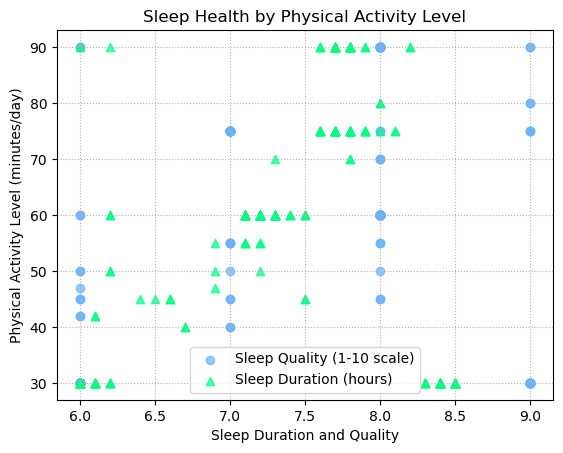

In [27]:
#combine sleep quality and sleep duration by physical activity level

#create scatter plot of Sleep Quality by Physical Activity Level
plt.scatter(df['Sleep Quality'], df['Physical Activity Level'], color='#66B2FF', alpha=0.7, label='Sleep Quality (1-10 scale)', marker='o')

#create scatter plot of Sleep Duration by Physical Activity Level
plt.scatter(df['Sleep Duration'], df['Physical Activity Level'], color='#00FF80', alpha=0.7, label='Sleep Duration (hours)', marker='^')

#format
plt.xlabel('Sleep Duration and Quality')
plt.ylabel('Physical Activity Level (minutes/day)')
plt.title('Sleep Health by Physical Activity Level')
plt.grid(True, linestyle=':')
plt.legend()

plt.show()

### Sleep Quality by Daily Steps

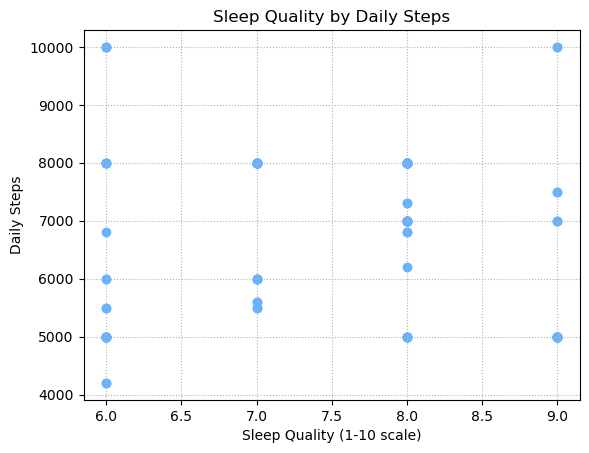

The correlation coefficient between Sleep Quality and Daily Steps is -0.01


In [28]:
#create scatter plot of Sleep Quality by Daily Steps

plt.scatter(df['Sleep Quality'], df['Daily Steps'], color='#66B2FF')
plt.xlabel('Sleep Quality (1-10 scale)')
plt.ylabel('Daily Steps')
plt.title('Sleep Quality by Daily Steps')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Sleep Quality'], df['Daily Steps'])
print(f"The correlation coefficient between Sleep Quality and Daily Steps is {round(correlation[0],2)}")

### Sleep Duration by Daily Steps

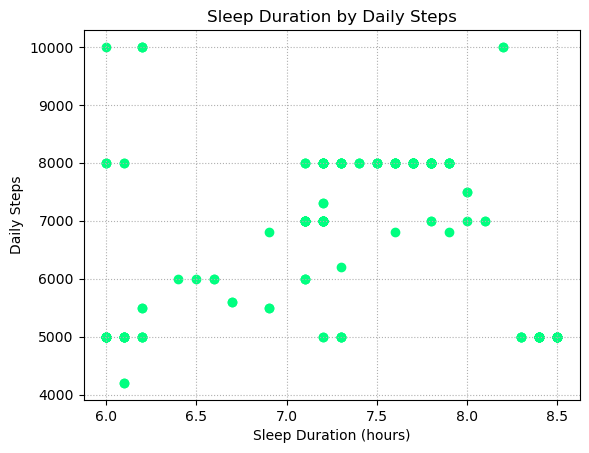

The correlation coefficient between Sleep Duration and Daily Steps is 0.09


In [29]:
#create scatter plot of Sleep Quality by Daily Steps

plt.scatter(df['Sleep Duration'], df['Daily Steps'], color='#00FF80')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.title('Sleep Duration by Daily Steps')
plt.grid(True, linestyle=':')

plt.show()

#Pearson Correlation Coefficient
correlation = stats.pearsonr(df['Sleep Duration'], df['Daily Steps'])
print(f"The correlation coefficient between Sleep Duration and Daily Steps is {round(correlation[0],2)}")

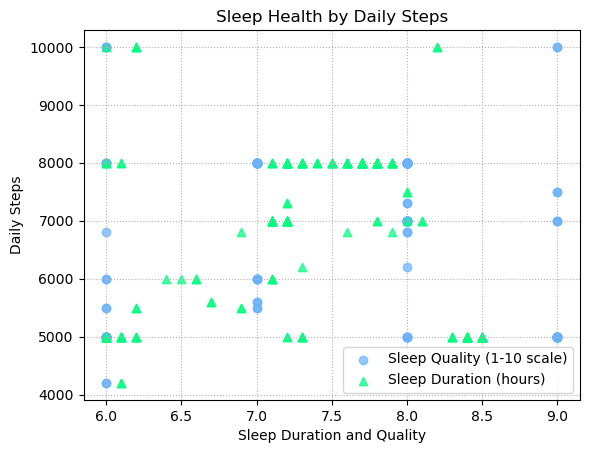

In [30]:
#combine sleep quality and sleep duration by physical activity level

#create scatter plot of Sleep Quality by Daily Steps
plt.scatter(df['Sleep Quality'], df['Daily Steps'], color='#66B2FF', alpha=0.7, label='Sleep Quality (1-10 scale)', marker='o')

#create scatter plot of Sleep Quality by Daily Steps
plt.scatter(df['Sleep Duration'], df['Daily Steps'], color='#00FF80', alpha=0.7, label='Sleep Duration (hours)', marker='^')

#format
plt.xlabel('Sleep Duration and Quality')
plt.ylabel('Daily Steps')
plt.title('Sleep Health by Daily Steps')
plt.grid(True, linestyle=':')
plt.legend()

plt.show()

## Analysis of Pearson Correlation Coefficients of Sleep Health by Excercise

The Pearson Correlation Coefficients for all of the items compared are very close to 0. This shows that none of the compared categories have a strong correlation. The most notable test is Sleep Duration by Physical Activity Level. It returned a Correlation Coefficient of 0.26, which is significantly higher than the other tests run. Despite appearing to have a strong correlation, there are a few points on both the high and the low end that balance it out. Due to this, we cannot reject the null hypothesis. The data shows that physical activity level and daily steps do not have a statistically significant impact on sleep quality or sleep duration.